# Exercise 4

In this Jupyter Notebook I simulated a system of molecules (in solid, liquid and gas phases) using the Verlet algorithm to evolves the system. <br>
This algorithm is derivered from two third-order Taylor expansion and results be a two step algorithm (is not self starting and it's necessary to assign a velocity to each molecule to obtain the previous position). The Verlet algorithm is time reversable and conserves the total energy of the system almost perfectly.

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

The graphs printed in this Jupyter Notebook are in reduced units.

## Solid state

$\rho^\star = 1.1$ <br>
$T^\star = 0.8$ <br>
Cut-off radius: $r_c = 2.2$

### <span style="color:green"> Wrong Temperature</span>

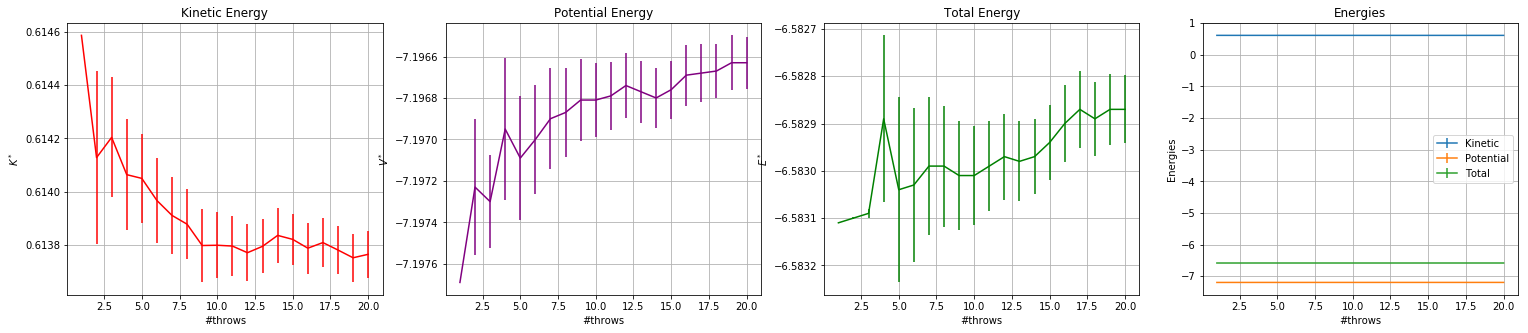

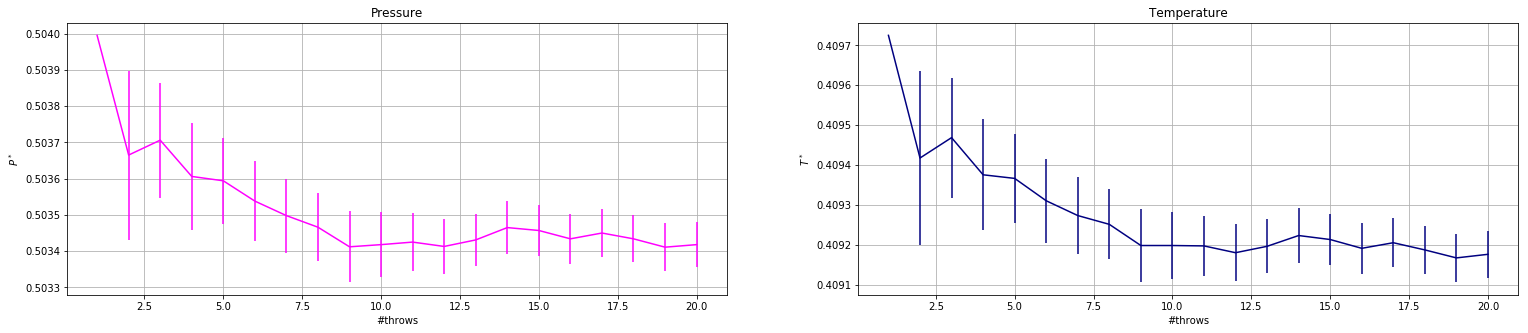

In [35]:
path_ekin = "MDNVE_MCNVT/Results/output_solid/output_ekin.dat"
path_epot = "MDNVE_MCNVT/Results/output_solid/output_epot.dat"
path_etot = "MDNVE_MCNVT/Results/output_solid/output_etot.dat"
path_pres = "MDNVE_MCNVT/Results/output_solid/output_pres.dat"
path_temp = "MDNVE_MCNVT/Results/output_solid/output_temp.dat"

x_ekin, ekin, err_ekin = np.loadtxt(path_ekin, usecols=(0,2,3), unpack='true')
x_epot, epot, err_epot = np.loadtxt(path_epot, usecols=(0,2,3), unpack='true')
x_etot, etot, err_etot = np.loadtxt(path_etot, usecols=(0,2,3), unpack='true')
x_pres, pres, err_pres = np.loadtxt(path_pres, usecols=(0,2,3), unpack='true')
x_temp, temp, err_temp = np.loadtxt(path_temp, usecols=(0,2,3), unpack='true')


fig, (ekin_plot, epot_plot, etot_plot, e_plot) = plt.subplots(1, 4, figsize=(26,5))

ekin_plot.errorbar(x_ekin, ekin, yerr=err_ekin, color="r")
ekin_plot.set_xlabel("#throws")
ekin_plot.set_ylabel("$K^*$")
ekin_plot.set_title("Kinetic Energy")
ekin_plot.grid(True)

epot_plot.errorbar(x_epot, epot, yerr=err_epot, color="purple")
epot_plot.set_xlabel("#throws")
epot_plot.set_ylabel("$V^*$")
epot_plot.set_title("Potential Energy")
epot_plot.grid(True)

etot_plot.errorbar(x_etot, etot, yerr=err_etot, color="green" )
etot_plot.set_xlabel("#throws")
etot_plot.set_ylabel("$E^*$")
etot_plot.set_title("Total Energy")
etot_plot.grid(True)

e_plot.errorbar(x_ekin, ekin, yerr=err_ekin, label="Kinetic")    
e_plot.errorbar(x_epot, epot, yerr=err_epot, label="Potential")     
e_plot.errorbar(x_etot, etot, yerr=err_etot, label="Total")
e_plot.set_xlabel("#throws")
e_plot.set_ylabel("Energies")
e_plot.set_title("Energies")
e_plot.legend()
e_plot.grid(True)

fig, (pres_plot, temp_plot) = plt.subplots(1, 2, figsize=(26,5))

pres_plot.errorbar(x_pres, pres, yerr=err_pres, color="fuchsia" )
pres_plot.set_xlabel("#throws")
pres_plot.set_ylabel("$P^*$")
pres_plot.set_title("Pressure")
pres_plot.grid(True)

temp_plot.errorbar(x_temp, temp, yerr=err_temp, color="navy" )
temp_plot.set_xlabel("#throws")
temp_plot.set_ylabel("$T^*$")
temp_plot.set_title("Temperature")
temp_plot.grid(True)

plt.show()

This graph shows the observables obtained after a row test. I didn't equilibrate the sistem and I started the simulation with T=0.8 but we can see that the final temperature is nearly 0.4 so the obtained values are not the requested.<br> 
This happens because the initial configuration (cristalline) is not that of equilibrium so the molecules have to "melt" and reach a better one. This "melting" in the solid increase the potential energy (the crystal is the lowest potential energy configuration) and decrease the kinetic one so the temperature drops.

### <span style="color:green"> Right Temperature </span>

#### Equilibration

To avoid the problem I restarted the simulation setting an higer temperature (starting temperature: 1.5407) and made an equilibration until the temperature is nearly constant to 0.8.


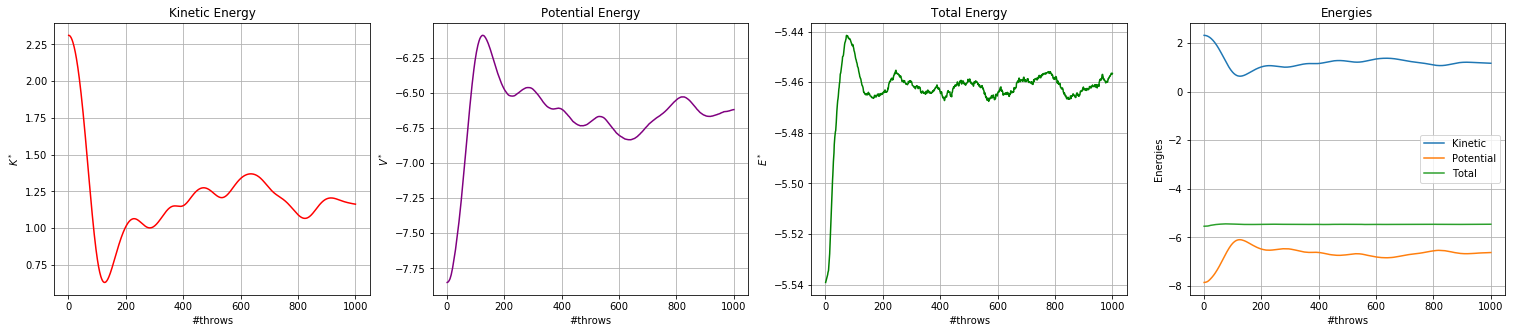

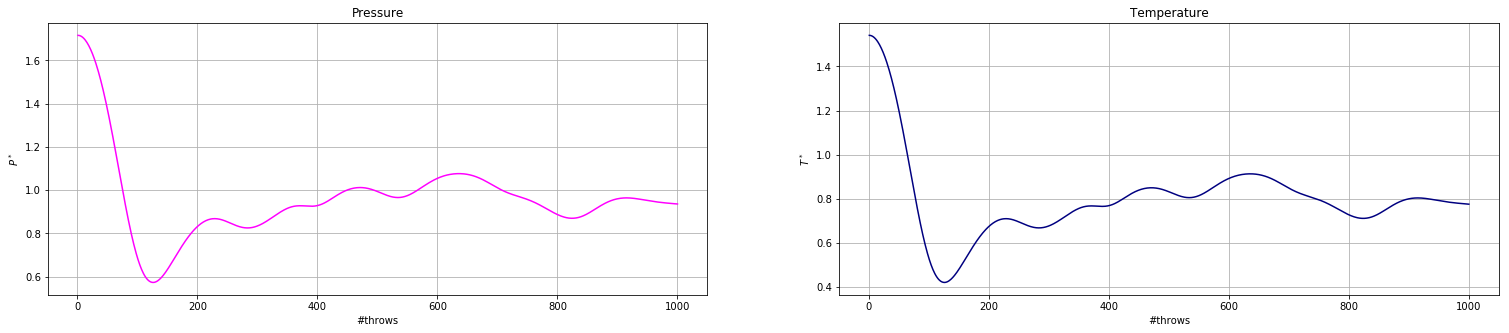

In [5]:
path_ekin = "MDNVE_MCNVT/Results/output_solid_equilibrated/equilibration/output_ekin.dat"
path_epot = "MDNVE_MCNVT/Results/output_solid_equilibrated/equilibration/output_epot.dat"
path_etot = "MDNVE_MCNVT/Results/output_solid_equilibrated/equilibration/output_etot.dat"
path_pres = "MDNVE_MCNVT/Results/output_solid_equilibrated/equilibration/output_pres.dat"
path_temp = "MDNVE_MCNVT/Results/output_solid_equilibrated/equilibration/output_temp.dat"

x_ekin, ekin = np.loadtxt(path_ekin, usecols=(0,1), unpack='true')
x_epot, epot = np.loadtxt(path_epot, usecols=(0,1), unpack='true')
x_etot, etot = np.loadtxt(path_etot, usecols=(0,1), unpack='true')
x_pres, pres = np.loadtxt(path_pres, usecols=(0,1), unpack='true')
x_temp, temp = np.loadtxt(path_temp, usecols=(0,1), unpack='true')

fig, (ekin_plot, epot_plot, etot_plot, e_plot) = plt.subplots(1, 4, figsize=(26,5))

ekin_plot.plot(x_ekin, ekin, color="r")
ekin_plot.set_xlabel("#throws")
ekin_plot.set_ylabel("$K^*$")
ekin_plot.set_title("Kinetic Energy")
ekin_plot.grid(True)

epot_plot.plot(x_epot, epot, color="purple")
epot_plot.set_xlabel("#throws")
epot_plot.set_ylabel("$V^*$")
epot_plot.set_title("Potential Energy")
epot_plot.grid(True)

etot_plot.plot(x_etot, etot, color="green" )
etot_plot.set_xlabel("#throws")
etot_plot.set_ylabel("$E^*$")
etot_plot.set_title("Total Energy")
etot_plot.grid(True)

e_plot.plot(x_ekin, ekin, label="Kinetic")    
e_plot.plot(x_epot, epot, label="Potential")     
e_plot.plot(x_etot, etot, label="Total")
e_plot.set_xlabel("#throws")
e_plot.set_ylabel("Energies")
e_plot.set_title("Energies")
e_plot.legend()
e_plot.grid(True)

fig, (pres_plot, temp_plot) = plt.subplots(1, 2, figsize=(26,5))

pres_plot.plot(x_pres, pres, color="fuchsia" )
pres_plot.set_xlabel("#throws")
pres_plot.set_ylabel("$P^*$")
pres_plot.set_title("Pressure")
pres_plot.grid(True)

temp_plot.plot(x_temp, temp, color="navy" )
temp_plot.set_xlabel("#throws")
temp_plot.set_ylabel("$T^*$")
temp_plot.set_title("Temperature")
temp_plot.grid(True)

plt.show()

Those graphs shows the istant value of each observables during the 1000 steps equilibration. After a steep variation, T is oscillating around the expected value, so I can start the simulation.

#### Equilibrated

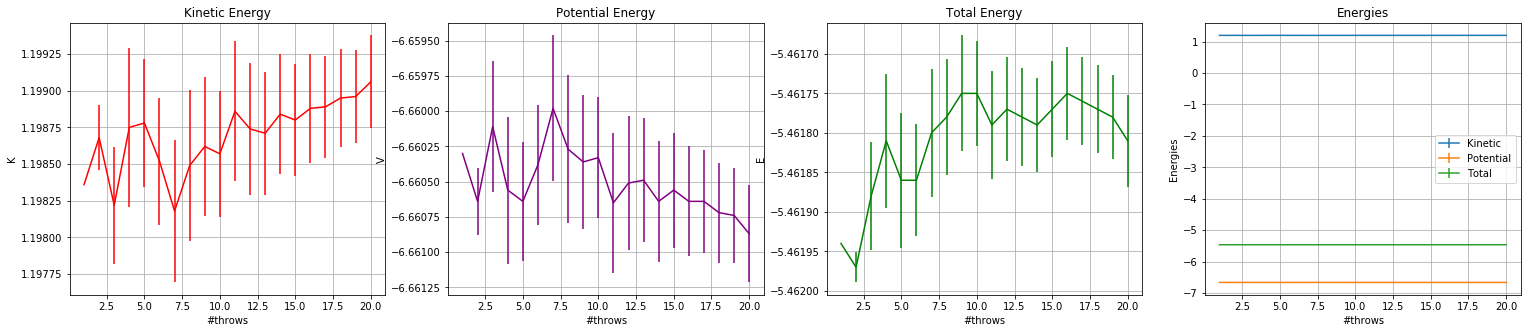

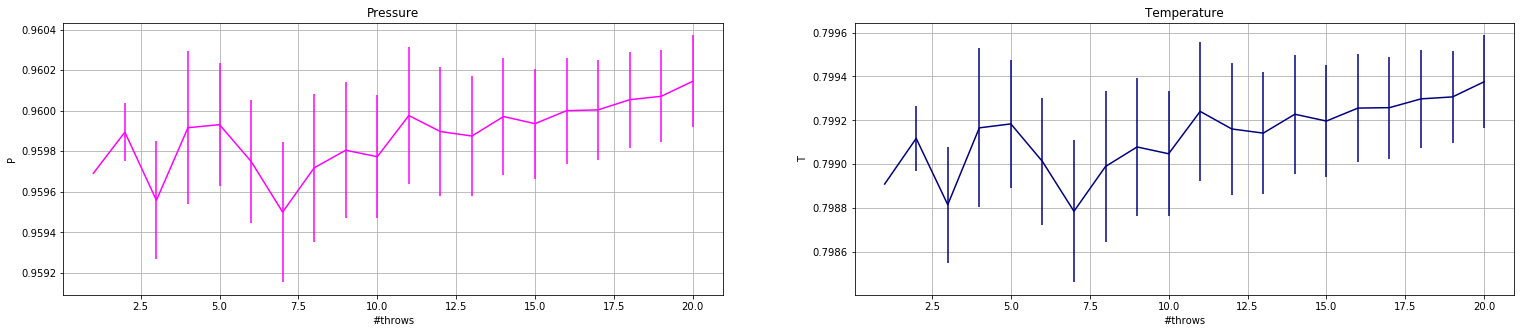

In [6]:
path_ekin = "MDNVE_MCNVT/Results/output_solid_equilibrated/equilibrated/output_ekin.dat"
path_epot = "MDNVE_MCNVT/Results/output_solid_equilibrated/equilibrated/output_epot.dat"
path_etot = "MDNVE_MCNVT/Results/output_solid_equilibrated/equilibrated/output_etot.dat"
path_pres = "MDNVE_MCNVT/Results/output_solid_equilibrated/equilibrated/output_pres.dat"
path_temp = "MDNVE_MCNVT/Results/output_solid_equilibrated/equilibrated/output_temp.dat"

x_ekin, ekin, err_ekin = np.loadtxt(path_ekin, usecols=(0,2,3), unpack='true')
x_epot, epot, err_epot = np.loadtxt(path_epot, usecols=(0,2,3), unpack='true')
x_etot, etot, err_etot = np.loadtxt(path_etot, usecols=(0,2,3), unpack='true')
x_pres, pres, err_pres = np.loadtxt(path_pres, usecols=(0,2,3), unpack='true')
x_temp, temp, err_temp = np.loadtxt(path_temp, usecols=(0,2,3), unpack='true')


fig, (ekin_plot, epot_plot, etot_plot, e_plot) = plt.subplots(1, 4, figsize=(26,5))

ekin_plot.errorbar(x_ekin, ekin, yerr=err_ekin, color="r")
ekin_plot.set_xlabel("#throws")
ekin_plot.set_ylabel("K")
ekin_plot.set_title("Kinetic Energy")
ekin_plot.grid(True)

epot_plot.errorbar(x_epot, epot, yerr=err_epot, color="purple")
epot_plot.set_xlabel("#throws")
epot_plot.set_ylabel("V")
epot_plot.set_title("Potential Energy")
epot_plot.grid(True)

etot_plot.errorbar(x_etot, etot, yerr=err_etot, color="green" )
etot_plot.set_xlabel("#throws")
etot_plot.set_ylabel("E")
etot_plot.set_title("Total Energy")
etot_plot.grid(True)

e_plot.errorbar(x_ekin, ekin, yerr=err_ekin, label="Kinetic")    
e_plot.errorbar(x_epot, epot, yerr=err_epot, label="Potential")     
e_plot.errorbar(x_etot, etot, yerr=err_etot, label="Total")
e_plot.set_xlabel("#throws")
e_plot.set_ylabel("Energies")
e_plot.set_title("Energies")
e_plot.legend()
e_plot.grid(True)

fig, (pres_plot, temp_plot) = plt.subplots(1, 2, figsize=(26,5))

pres_plot.errorbar(x_pres, pres, yerr=err_pres, color="fuchsia" )
pres_plot.set_xlabel("#throws")
pres_plot.set_ylabel("P")
pres_plot.set_title("Pressure")
pres_plot.grid(True)

temp_plot.errorbar(x_temp, temp, yerr=err_temp, color="navy" )
temp_plot.set_xlabel("#throws")
temp_plot.set_ylabel("T")
temp_plot.set_title("Temperature")
temp_plot.grid(True)

plt.show()

Those graph shows the cumulative mean of the observables over 20 blocks of 10000 steps each. 

# Liquid state

$\rho^\star = 0.8$ <br>
$T^\star = 1.1$ <br>
Cut-off radius: $r_c = 2.5$

### <span style="color:green"> Wrong Temperature </span>

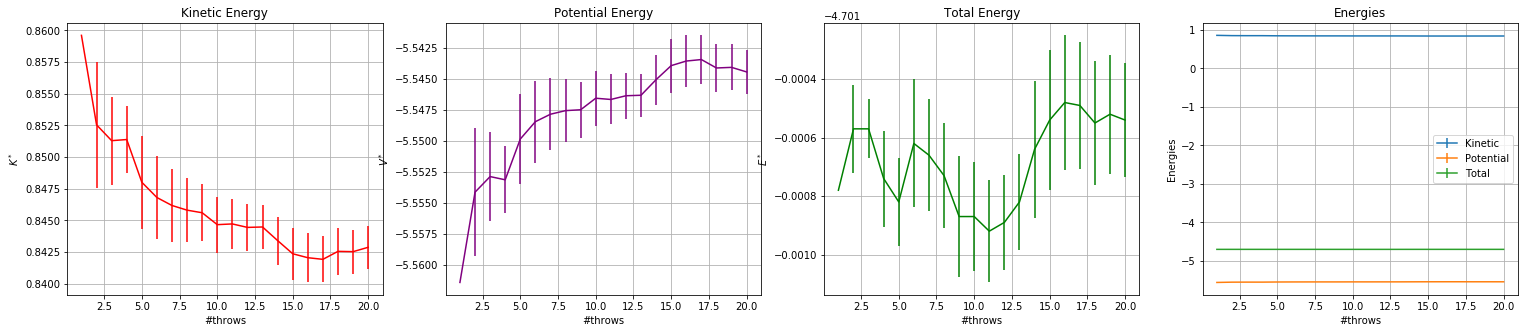

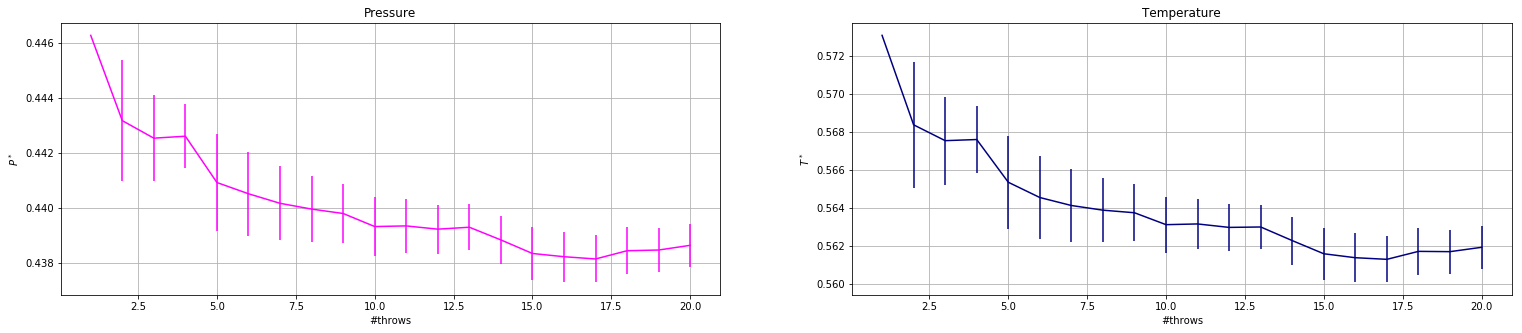

In [7]:
path_ekin = "MDNVE_MCNVT/Results/output_liquid/output_ekin.dat"
path_epot = "MDNVE_MCNVT/Results/output_liquid/output_epot.dat"
path_etot = "MDNVE_MCNVT/Results/output_liquid/output_etot.dat"
path_pres = "MDNVE_MCNVT/Results/output_liquid/output_pres.dat"
path_temp = "MDNVE_MCNVT/Results/output_liquid/output_temp.dat"

x_ekin, ekin, err_ekin = np.loadtxt(path_ekin, usecols=(0,2,3), unpack='true')
x_epot, epot, err_epot = np.loadtxt(path_epot, usecols=(0,2,3), unpack='true')
x_etot, etot, err_etot = np.loadtxt(path_etot, usecols=(0,2,3), unpack='true')
x_pres, pres, err_pres = np.loadtxt(path_pres, usecols=(0,2,3), unpack='true')
x_temp, temp, err_temp = np.loadtxt(path_temp, usecols=(0,2,3), unpack='true')


fig, (ekin_plot, epot_plot, etot_plot, e_plot) = plt.subplots(1, 4, figsize=(26,5))

ekin_plot.errorbar(x_ekin, ekin, yerr=err_ekin, color="r")
ekin_plot.set_xlabel("#throws")
ekin_plot.set_ylabel("$K^*$")
ekin_plot.set_title("Kinetic Energy")
ekin_plot.grid(True)

epot_plot.errorbar(x_epot, epot, yerr=err_epot, color="purple")
epot_plot.set_xlabel("#throws")
epot_plot.set_ylabel("$V^*$")
epot_plot.set_title("Potential Energy")
epot_plot.grid(True)

etot_plot.errorbar(x_etot, etot, yerr=err_etot, color="green" )
etot_plot.set_xlabel("#throws")
etot_plot.set_ylabel("$E^*$")
etot_plot.set_title("Total Energy")
etot_plot.grid(True)

e_plot.errorbar(x_ekin, ekin, yerr=err_ekin, label="Kinetic")    
e_plot.errorbar(x_epot, epot, yerr=err_epot, label="Potential")     
e_plot.errorbar(x_etot, etot, yerr=err_etot, label="Total")
e_plot.set_xlabel("#throws")
e_plot.set_ylabel("Energies")
e_plot.set_title("Energies")
e_plot.legend()
e_plot.grid(True)

fig, (pres_plot, temp_plot) = plt.subplots(1, 2, figsize=(26,5))

pres_plot.errorbar(x_pres, pres, yerr=err_pres, color="fuchsia" )
pres_plot.set_xlabel("#throws")
pres_plot.set_ylabel("$P^*$")
pres_plot.set_title("Pressure")
pres_plot.grid(True)

temp_plot.errorbar(x_temp, temp, yerr=err_temp, color="navy" )
temp_plot.set_xlabel("#throws")
temp_plot.set_ylabel("$T^*$")
temp_plot.set_title("Temperature")
temp_plot.grid(True)

plt.show()

As in the solid phase the liquid decrease its temperature due to the "melting" and I have to equilibrate the sistem. In this case I have to reach $T^*=1.1$ and I started from $T^*=1.98$

### <span style="color:green"> Right Temperature </span>

#### Equilibration

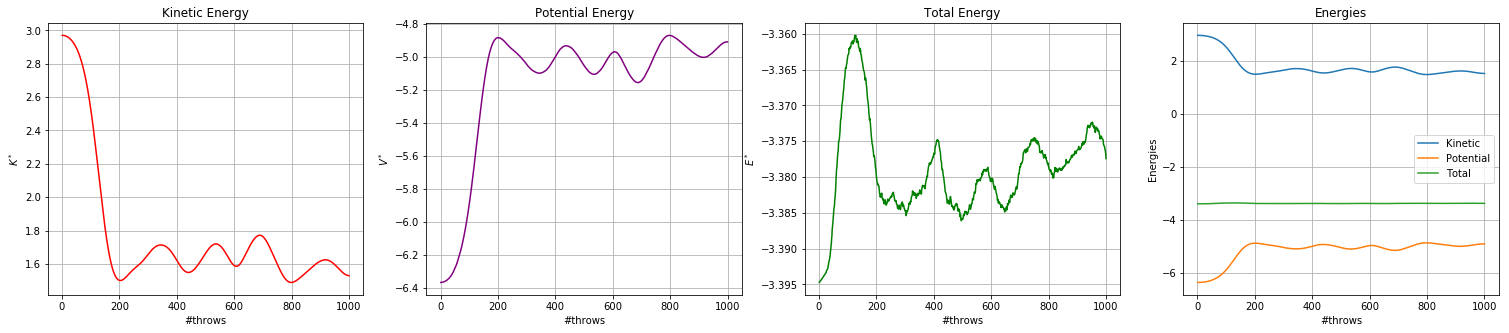

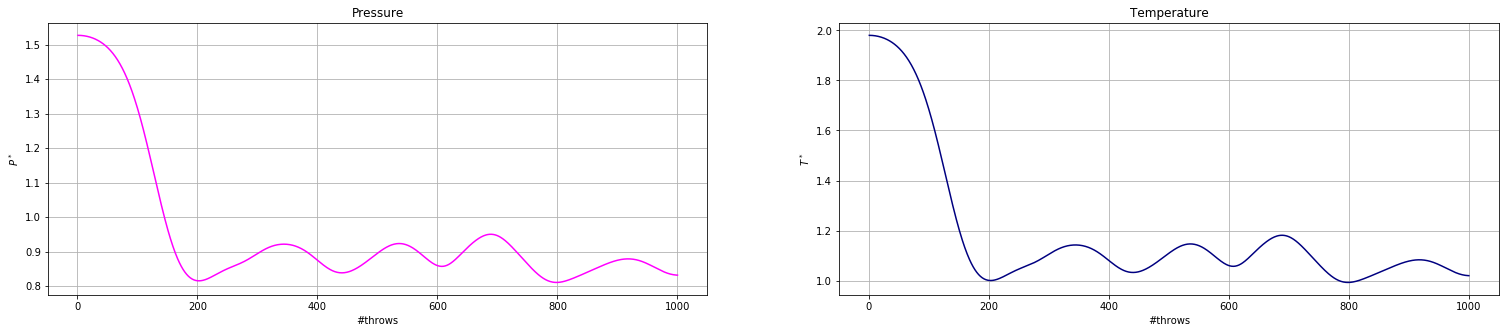

In [9]:
path_ekin = "MDNVE_MCNVT/Results/output_liquid_equilibrated/equilibration/output_ekin.dat"
path_epot = "MDNVE_MCNVT/Results/output_liquid_equilibrated/equilibration/output_epot.dat"
path_etot = "MDNVE_MCNVT/Results/output_liquid_equilibrated/equilibration/output_etot.dat"
path_pres = "MDNVE_MCNVT/Results/output_liquid_equilibrated/equilibration/output_pres.dat"
path_temp = "MDNVE_MCNVT/Results/output_liquid_equilibrated/equilibration/output_temp.dat"

x_ekin, ekin = np.loadtxt(path_ekin, usecols=(0,1), unpack='true')
x_epot, epot = np.loadtxt(path_epot, usecols=(0,1), unpack='true')
x_etot, etot = np.loadtxt(path_etot, usecols=(0,1), unpack='true')
x_pres, pres = np.loadtxt(path_pres, usecols=(0,1), unpack='true')
x_temp, temp = np.loadtxt(path_temp, usecols=(0,1), unpack='true')

fig, (ekin_plot, epot_plot, etot_plot, e_plot) = plt.subplots(1, 4, figsize=(26,5))

ekin_plot.plot(x_ekin, ekin, color="r")
ekin_plot.set_xlabel("#throws")
ekin_plot.set_ylabel("$K^*$")
ekin_plot.set_title("Kinetic Energy")
ekin_plot.grid(True)

epot_plot.plot(x_epot, epot, color="purple")
epot_plot.set_xlabel("#throws")
epot_plot.set_ylabel("$V^*$")
epot_plot.set_title("Potential Energy")
epot_plot.grid(True)

etot_plot.plot(x_etot, etot, color="green" )
etot_plot.set_xlabel("#throws")
etot_plot.set_ylabel("$E^*$")
etot_plot.set_title("Total Energy")
etot_plot.grid(True)

e_plot.plot(x_ekin, ekin, label="Kinetic")    
e_plot.plot(x_epot, epot, label="Potential")     
e_plot.plot(x_etot, etot, label="Total")
e_plot.set_xlabel("#throws")
e_plot.set_ylabel("Energies")
e_plot.set_title("Energies")
e_plot.legend()
e_plot.grid(True)

fig, (pres_plot, temp_plot) = plt.subplots(1, 2, figsize=(26,5))

pres_plot.plot(x_pres, pres, color="fuchsia" )
pres_plot.set_xlabel("#throws")
pres_plot.set_ylabel("$P^*$")
pres_plot.set_title("Pressure")
pres_plot.grid(True)

temp_plot.plot(x_temp, temp, color="navy" )
temp_plot.set_xlabel("#throws")
temp_plot.set_ylabel("$T^*$")
temp_plot.set_title("Temperature")
temp_plot.grid(True)

plt.show()

As in the solid, the equilibration is fast and we have no particular trouble to graph the comulative mean of the observables over 20 block with 10000 steps each.

#### Equilibrated

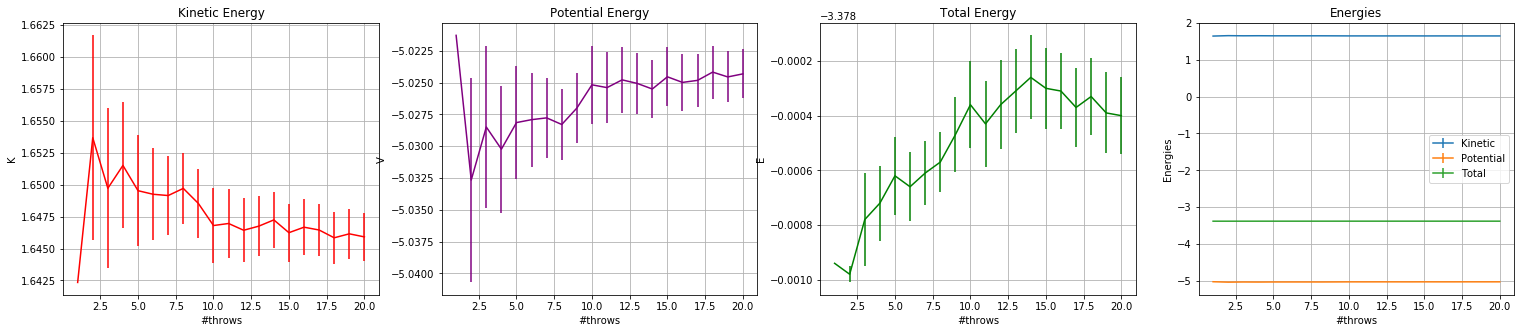

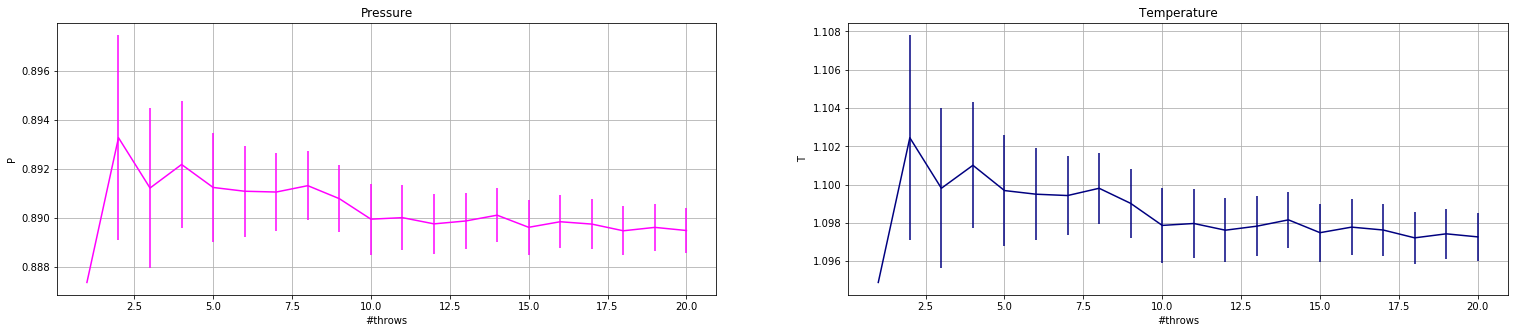

In [20]:
path_ekin = "MDNVE_MCNVT/Results/output_liquid_equilibrated/equilibrated/output_ekin.dat"
path_epot = "MDNVE_MCNVT/Results/output_liquid_equilibrated/equilibrated/output_epot.dat"
path_etot = "MDNVE_MCNVT/Results/output_liquid_equilibrated/equilibrated/output_etot.dat"
path_pres = "MDNVE_MCNVT/Results/output_liquid_equilibrated/equilibrated/output_pres.dat"
path_temp = "MDNVE_MCNVT/Results/output_liquid_equilibrated/equilibrated/output_temp.dat"

x_ekin, ekin, err_ekin = np.loadtxt(path_ekin, usecols=(0,2,3), unpack='true')
x_epot, epot, err_epot = np.loadtxt(path_epot, usecols=(0,2,3), unpack='true')
x_etot, etot, err_etot = np.loadtxt(path_etot, usecols=(0,2,3), unpack='true')
x_pres, pres, err_pres = np.loadtxt(path_pres, usecols=(0,2,3), unpack='true')
x_temp, temp, err_temp = np.loadtxt(path_temp, usecols=(0,2,3), unpack='true')


fig, (ekin_plot, epot_plot, etot_plot, e_plot) = plt.subplots(1, 4, figsize=(26,5))

ekin_plot.errorbar(x_ekin, ekin, yerr=err_ekin, color="r")
ekin_plot.set_xlabel("#throws")
ekin_plot.set_ylabel("K")
ekin_plot.set_title("Kinetic Energy")
ekin_plot.grid(True)

epot_plot.errorbar(x_epot, epot, yerr=err_epot, color="purple")
epot_plot.set_xlabel("#throws")
epot_plot.set_ylabel("V")
epot_plot.set_title("Potential Energy")
epot_plot.grid(True)

etot_plot.errorbar(x_etot, etot, yerr=err_etot, color="green" )
etot_plot.set_xlabel("#throws")
etot_plot.set_ylabel("E")
etot_plot.set_title("Total Energy")
etot_plot.grid(True)

e_plot.errorbar(x_ekin, ekin, yerr=err_ekin, label="Kinetic")    
e_plot.errorbar(x_epot, epot, yerr=err_epot, label="Potential")     
e_plot.errorbar(x_etot, etot, yerr=err_etot, label="Total")
e_plot.set_xlabel("#throws")
e_plot.set_ylabel("Energies")
e_plot.set_title("Energies")
e_plot.legend()
e_plot.grid(True)

fig, (pres_plot, temp_plot) = plt.subplots(1, 2, figsize=(26,5))

pres_plot.errorbar(x_pres, pres, yerr=err_pres, color="fuchsia" )
pres_plot.set_xlabel("#throws")
pres_plot.set_ylabel("P")
pres_plot.set_title("Pressure")
pres_plot.grid(True)

temp_plot.errorbar(x_temp, temp, yerr=err_temp, color="navy" )
temp_plot.set_xlabel("#throws")
temp_plot.set_ylabel("T")
temp_plot.set_title("Temperature")
temp_plot.grid(True)

plt.show()

The temperature is slightly less than the target one but is within a $\sigma$ so the simulation shows good values.

# Gas state

$\rho^\star = 0.05$ <br>
$T^\star = 1.2$ <br>
Cut-off radius: $r_c = 5$

### <span style="color:green"> Wrong Temperature </span>

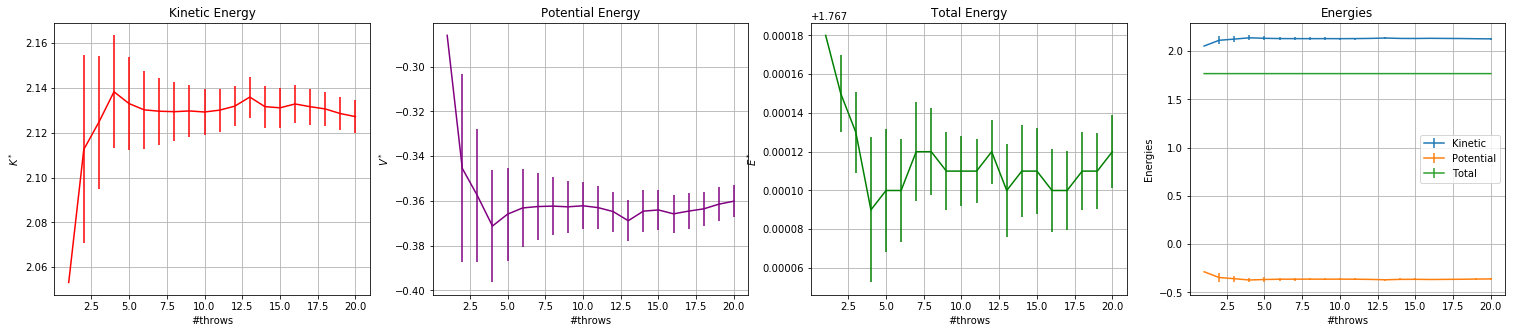

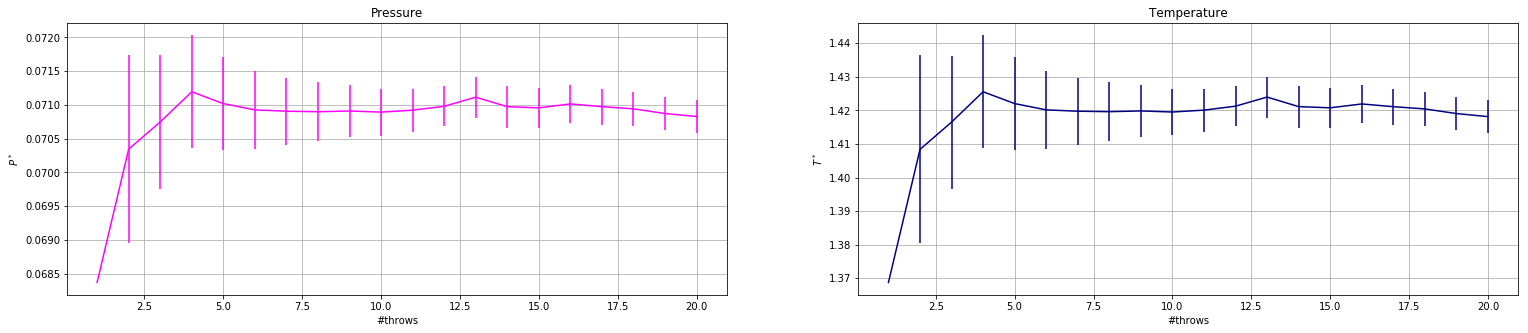

In [22]:
path_ekin = "MDNVE_MCNVT/Results/output_gas/output_ekin.dat"
path_epot = "MDNVE_MCNVT/Results/output_gas/output_epot.dat"
path_etot = "MDNVE_MCNVT/Results/output_gas/output_etot.dat"
path_pres = "MDNVE_MCNVT/Results/output_gas/output_pres.dat"
path_temp = "MDNVE_MCNVT/Results/output_gas/output_temp.dat"

x_ekin, ekin, err_ekin = np.loadtxt(path_ekin, usecols=(0,2,3), unpack='true')
x_epot, epot, err_epot = np.loadtxt(path_epot, usecols=(0,2,3), unpack='true')
x_etot, etot, err_etot = np.loadtxt(path_etot, usecols=(0,2,3), unpack='true')
x_pres, pres, err_pres = np.loadtxt(path_pres, usecols=(0,2,3), unpack='true')
x_temp, temp, err_temp = np.loadtxt(path_temp, usecols=(0,2,3), unpack='true')


fig, (ekin_plot, epot_plot, etot_plot, e_plot) = plt.subplots(1, 4, figsize=(26,5))

ekin_plot.errorbar(x_ekin, ekin, yerr=err_ekin, color="r")
ekin_plot.set_xlabel("#throws")
ekin_plot.set_ylabel("$K^*$")
ekin_plot.set_title("Kinetic Energy")
ekin_plot.grid(True)

epot_plot.errorbar(x_epot, epot, yerr=err_epot, color="purple")
epot_plot.set_xlabel("#throws")
epot_plot.set_ylabel("$V^*$")
epot_plot.set_title("Potential Energy")
epot_plot.grid(True)

etot_plot.errorbar(x_etot, etot, yerr=err_etot, color="green" )
etot_plot.set_xlabel("#throws")
etot_plot.set_ylabel("$E^*$")
etot_plot.set_title("Total Energy")
etot_plot.grid(True)

e_plot.errorbar(x_ekin, ekin, yerr=err_ekin, label="Kinetic")    
e_plot.errorbar(x_epot, epot, yerr=err_epot, label="Potential")     
e_plot.errorbar(x_etot, etot, yerr=err_etot, label="Total")
e_plot.set_xlabel("#throws")
e_plot.set_ylabel("Energies")
e_plot.set_title("Energies")
e_plot.legend()
e_plot.grid(True)

fig, (pres_plot, temp_plot) = plt.subplots(1, 2, figsize=(26,5))

pres_plot.errorbar(x_pres, pres, yerr=err_pres, color="fuchsia" )
pres_plot.set_xlabel("#throws")
pres_plot.set_ylabel("$P^*$")
pres_plot.set_title("Pressure")
pres_plot.grid(True)

temp_plot.errorbar(x_temp, temp, yerr=err_temp, color="navy" )
temp_plot.set_xlabel("#throws")
temp_plot.set_ylabel("$T^*$")
temp_plot.set_title("Temperature")
temp_plot.grid(True)

plt.show()

It's tivial to notice the temperature is increasing instead of decrease and the potential energy decrease even down the potential energy of the crystal. <br>
This could happen due to the high liberty of the molecules in the gas phase, that allow the molecules to increase their reciprocal distance and so decrease the potential energy.<br>


### <span style="color:green"> Right Temperature </span>

#### Equilibration

Equilibrating the gas phase is not so easy because it have to "melt" to liquid and then "evaporate" to gas, therefore it takes more steps to reach the equilibrium. <br>
To reach the target temperature of 1.2 I had to start the equilibration from $T^*=0.96$.

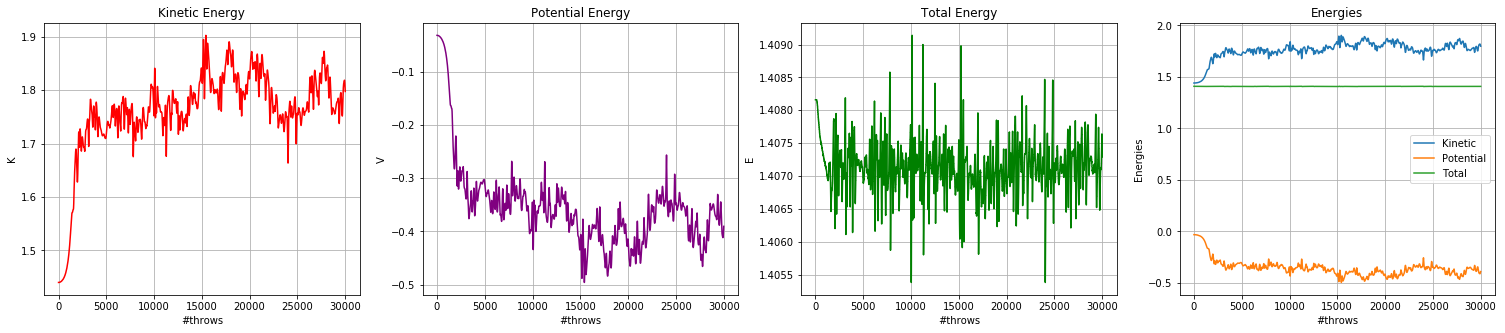

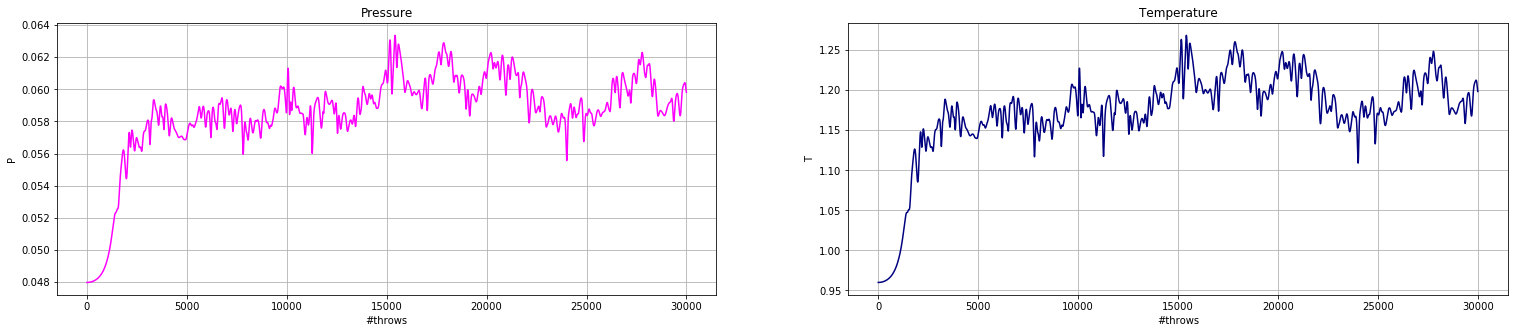

In [48]:
path_ekin = "MDNVE_MCNVT/Results/output_gas_equilibrated/equilibration/output_ekin.dat"
path_epot = "MDNVE_MCNVT/Results/output_gas_equilibrated/equilibration/output_epot.dat"
path_etot = "MDNVE_MCNVT/Results/output_gas_equilibrated/equilibration/output_etot.dat"
path_pres = "MDNVE_MCNVT/Results/output_gas_equilibrated/equilibration/output_pres.dat"
path_temp = "MDNVE_MCNVT/Results/output_gas_equilibrated/equilibration/output_temp.dat"

x_ekin, ekin = np.loadtxt(path_ekin, usecols=(0,1), unpack='true')
x_epot, epot = np.loadtxt(path_epot, usecols=(0,1), unpack='true')
x_etot, etot = np.loadtxt(path_etot, usecols=(0,1), unpack='true')
x_pres, pres = np.loadtxt(path_pres, usecols=(0,1), unpack='true')
x_temp, temp = np.loadtxt(path_temp, usecols=(0,1), unpack='true')


fig, (ekin_plot, epot_plot, etot_plot, e_plot) = plt.subplots(1, 4, figsize=(26,5))

ekin_plot.plot(x_ekin, ekin, color="r")
ekin_plot.set_xlabel("#throws")
ekin_plot.set_ylabel("K")
ekin_plot.set_title("Kinetic Energy")
ekin_plot.grid(True)

epot_plot.plot(x_epot, epot, color="purple")
epot_plot.set_xlabel("#throws")
epot_plot.set_ylabel("V")
epot_plot.set_title("Potential Energy")
epot_plot.grid(True)

etot_plot.plot(x_etot, etot, color="green" )
etot_plot.set_xlabel("#throws")
etot_plot.set_ylabel("E")
etot_plot.set_title("Total Energy")
etot_plot.grid(True)

e_plot.plot(x_ekin, ekin, label="Kinetic")    
e_plot.plot(x_epot, epot, label="Potential")     
e_plot.plot(x_etot, etot, label="Total")
e_plot.set_xlabel("#throws")
e_plot.set_ylabel("Energies")
e_plot.set_title("Energies")
e_plot.legend()
e_plot.grid(True)

fig, (pres_plot, temp_plot) = plt.subplots(1, 2, figsize=(26,5))

pres_plot.plot(x_pres, pres, color="fuchsia" )
pres_plot.set_xlabel("#throws")
pres_plot.set_ylabel("P")
pres_plot.set_title("Pressure")
pres_plot.grid(True)

temp_plot.plot(x_temp, temp, color="navy" )
temp_plot.set_xlabel("#throws")
temp_plot.set_ylabel("T")
temp_plot.set_title("Temperature")
temp_plot.grid(True)

plt.show()

The equilibration graph of the energies shows how the Verlet algorithm let the total enegrgy be constant how expected.

#### Equilibrated

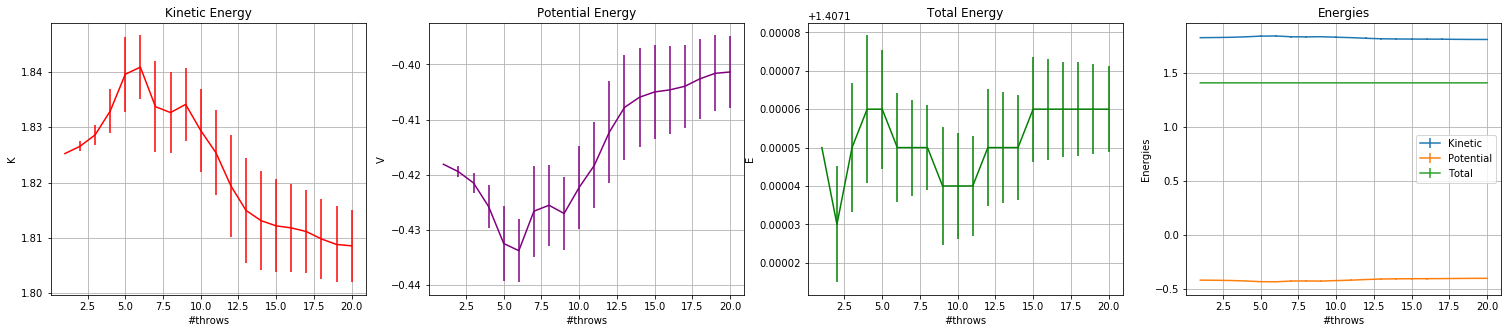

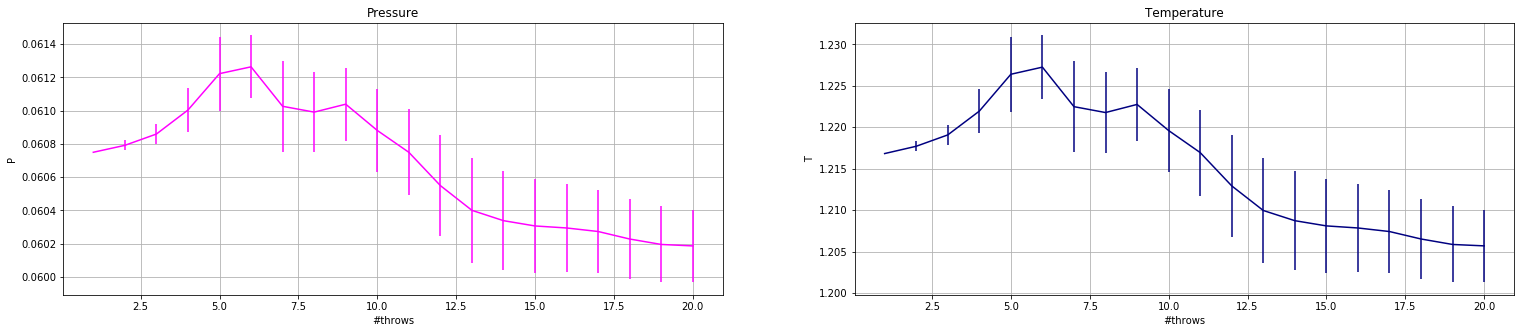

In [49]:
path_ekin = "MDNVE_MCNVT/Results/output_gas_equilibrated/equilibrated/output_ekin.dat"
path_epot = "MDNVE_MCNVT/Results/output_gas_equilibrated/equilibrated/output_epot.dat"
path_etot = "MDNVE_MCNVT/Results/output_gas_equilibrated/equilibrated/output_etot.dat"
path_pres = "MDNVE_MCNVT/Results/output_gas_equilibrated/equilibrated/output_pres.dat"
path_temp = "MDNVE_MCNVT/Results/output_gas_equilibrated/equilibrated/output_temp.dat"

x_ekin, ekin, err_ekin = np.loadtxt(path_ekin, usecols=(0,2,3), unpack='true')
x_epot, epot, err_epot = np.loadtxt(path_epot, usecols=(0,2,3), unpack='true')
x_etot, etot, err_etot = np.loadtxt(path_etot, usecols=(0,2,3), unpack='true')
x_pres, pres, err_pres = np.loadtxt(path_pres, usecols=(0,2,3), unpack='true')
x_temp, temp, err_temp = np.loadtxt(path_temp, usecols=(0,2,3), unpack='true')


fig, (ekin_plot, epot_plot, etot_plot, e_plot) = plt.subplots(1, 4, figsize=(26,5))

ekin_plot.errorbar(x_ekin, ekin, yerr=err_ekin, color="r")
ekin_plot.set_xlabel("#throws")
ekin_plot.set_ylabel("K")
ekin_plot.set_title("Kinetic Energy")
ekin_plot.grid(True)

epot_plot.errorbar(x_epot, epot, yerr=err_epot, color="purple")
epot_plot.set_xlabel("#throws")
epot_plot.set_ylabel("V")
epot_plot.set_title("Potential Energy")
epot_plot.grid(True)

etot_plot.errorbar(x_etot, etot, yerr=err_etot, color="green" )
etot_plot.set_xlabel("#throws")
etot_plot.set_ylabel("E")
etot_plot.set_title("Total Energy")
etot_plot.grid(True)

e_plot.errorbar(x_ekin, ekin, yerr=err_ekin, label="Kinetic")    
e_plot.errorbar(x_epot, epot, yerr=err_epot, label="Potential")     
e_plot.errorbar(x_etot, etot, yerr=err_etot, label="Total")
e_plot.set_xlabel("#throws")
e_plot.set_ylabel("Energies")
e_plot.set_title("Energies")
e_plot.legend()
e_plot.grid(True)

fig, (pres_plot, temp_plot) = plt.subplots(1, 2, figsize=(26,5))

pres_plot.errorbar(x_pres, pres, yerr=err_pres, color="fuchsia" )
pres_plot.set_xlabel("#throws")
pres_plot.set_ylabel("P")
pres_plot.set_title("Pressure")
pres_plot.grid(True)

temp_plot.errorbar(x_temp, temp, yerr=err_temp, color="navy" )
temp_plot.set_xlabel("#throws")
temp_plot.set_ylabel("T")
temp_plot.set_title("Temperature")
temp_plot.grid(True)

plt.show()

The graphs obtained shows how the gas phase has high fluctuation even after a 30000 steps equilibration.